In [1]:
#Datos con ventanas de 4 horas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_excel("C:/Users/bhgtb/OneDrive - unimilitar.edu.co/Doctorado/Electiva IA/sv_metr1.xlsx")
aux = 24
FCT = df.iloc[0:aux,:]
FCF = df.iloc[aux:aux*2,:]
PAST = df.iloc[aux*2:aux*3,:]
PASF = df.iloc[aux*3:aux*4,:]
PADT = df.iloc[aux*4:aux*5,:]
PADF = df.iloc[aux*5:aux*6,:]
TT = df.iloc[aux*6:aux*7,:]
TF = df.iloc[aux*7:aux*8,:]

FC = pd.concat([FCT,FCF],axis=0)
PAS = pd.concat([PAST,PASF],axis=0)
PAD = pd.concat([PADT,PADF],axis=0)
T = pd.concat([TT,TF],axis=0)



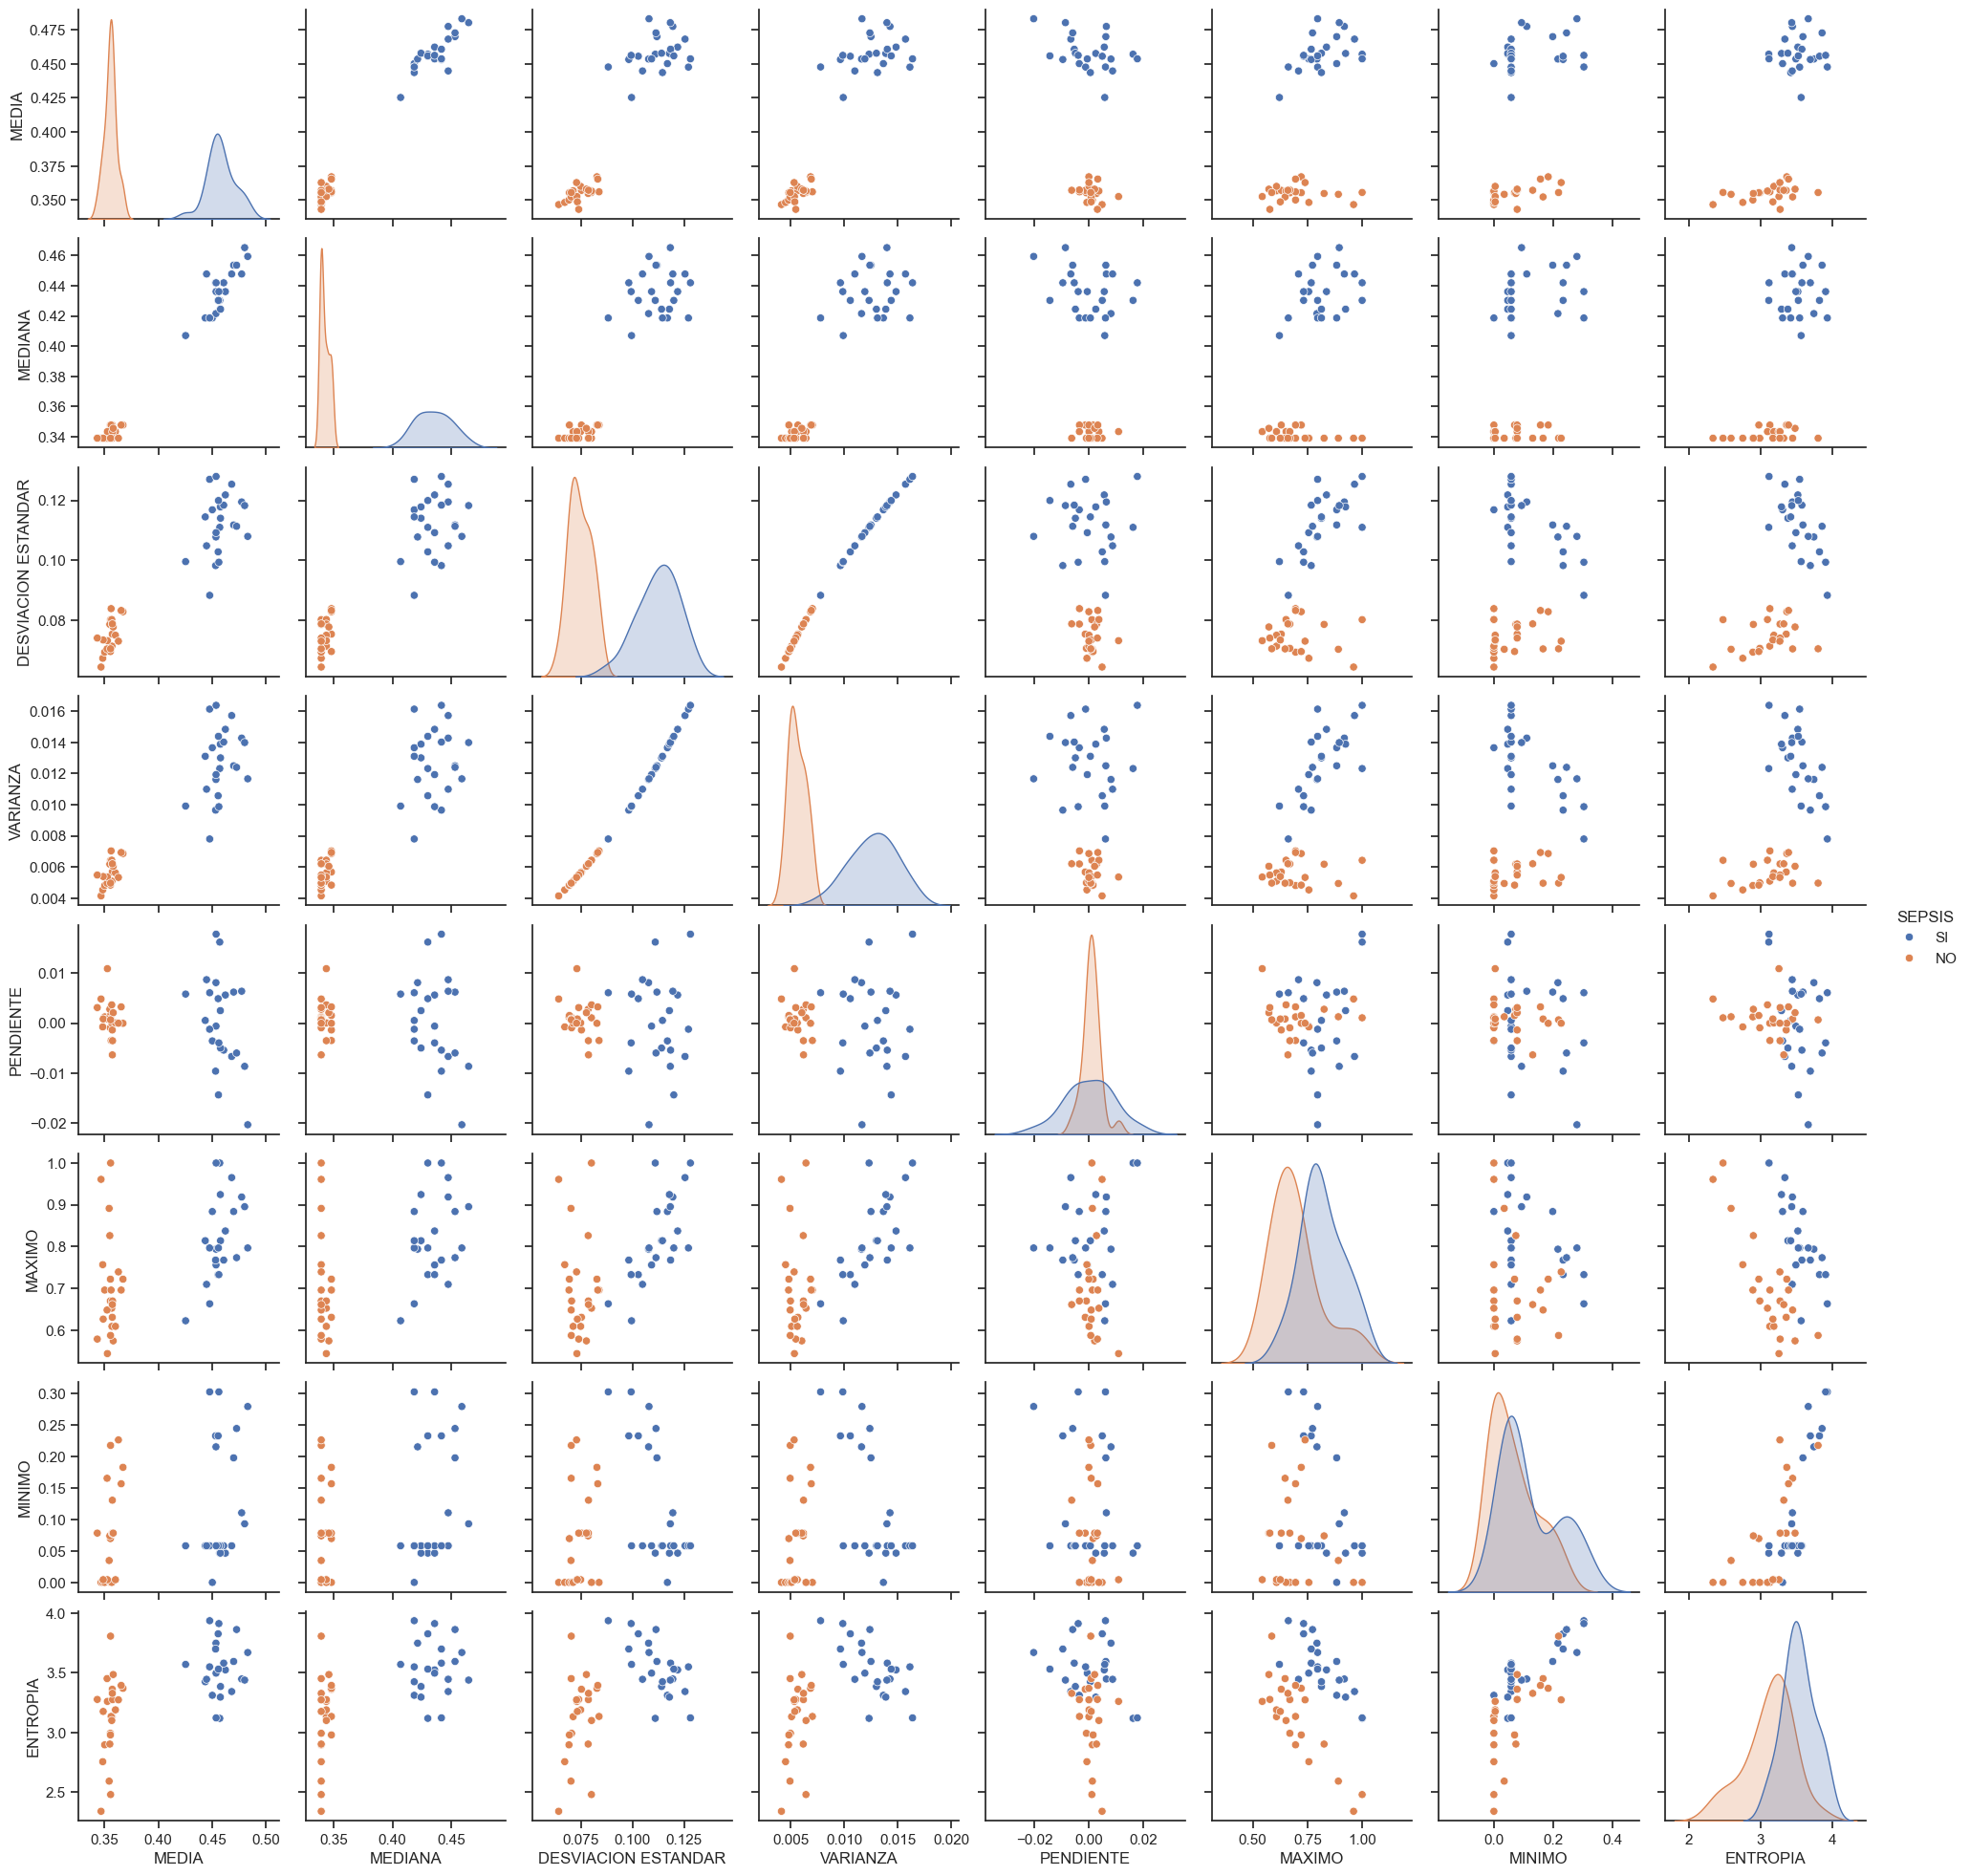

In [3]:
sns.set_theme(style="ticks")
sns.pairplot(FC, hue="SEPSIS")

In [33]:

FCTm  = pd.DataFrame(columns=FC.columns)
FCFm  = pd.DataFrame(columns=FC.columns)
PASTm = pd.DataFrame(columns=FC.columns)
PASFm = pd.DataFrame(columns=FC.columns) 
PADTm = pd.DataFrame(columns=FC.columns)
PADFm = pd.DataFrame(columns=FC.columns)
TTm = pd.DataFrame(columns=FC.columns)
TFm = pd.DataFrame(columns=FC.columns)

FCTm.loc[0,'BIN'] = "FCT"
FCFm.loc[0,'BIN'] = "FCF"
PASTm.loc[0,'BIN'] = "PAST"
PASFm.loc[0,'BIN'] = "PASF" 
PADTm.loc[0,'BIN'] = "PADT"
PADFm.loc[0,'BIN'] = "PADF"
TTm.loc[0,'BIN'] = "TT"
TFm.loc[0,'BIN'] = "TF"

FCTm.loc[0,'SEPSIS'] = "Si"
FCFm.loc[0,'SEPSIS'] = "No"
PASTm.loc[0,'SEPSIS'] = "Si"
PASFm.loc[0,'SEPSIS'] = "No" 
PADTm.loc[0,'SEPSIS'] = "Si"
PADFm.loc[0,'SEPSIS'] = "No"
TTm.loc[0,'SEPSIS'] = "Si"
TFm.loc[0,'SEPSIS'] = "No"

for i in range(len(FC.columns) - 2):
    
    FCTm.iloc[0,i+1] = np.mean(FCT.iloc[:,i+1])
    FCFm.iloc[0,i+1] = np.mean(FCF.iloc[:,i+1])
    PASTm.iloc[0,i+1] = np.mean(PAST.iloc[:,i+1])
    PASFm.iloc[0,i+1] = np.mean(PASF.iloc[:,i+1])
    PADTm.iloc[0,i+1] = np.mean(PADT.iloc[:,i+1])
    PADFm.iloc[0,i+1] = np.mean(PADF.iloc[:,i+1])
    TTm.iloc[0,i+1] = np.mean(TT.iloc[:,i+1])
    TFm.iloc[0,i+1] = np.mean(TF.iloc[:,i+1])
    
    
FCm = pd.concat([FCTm,FCFm])
PASm = pd.concat([PASTm,PASFm])
PADm = pd.concat([PADTm,PADFm])
Tm = pd.concat([TTm,TFm])


In [70]:
def  euclidian (x1,y1,x2,y2):
    return math.sqrt(x2 - x1)**2 + (y2 - y1)**2
    
Totalm = pd.concat([FCm, PASm, PADm, Tm])

Totalm

Distant = np.zeros([int(2**(len(Totalm) / 2)) - 1, len(Totalm.columns) - 2]) 

Distant

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
Totalm

,BIN,MEDIA,MEDIANA,DESVIACION ESTANDAR,VARIANZA,PENDIENTE,MAXIMO,MINIMO,ENTROPIA,SEPSIS
0,FCT,0.457788,0.435441,0.112225,0.012689,0.000151,0.818435,0.122093,3.5351,Si
0,FCF,0.355393,0.34212,0.074626,0.005596,0.000902,0.69837,0.065942,3.123142,No
0,PAST,0.383952,0.382224,0.103622,0.010794,0.001314,0.719012,0.099456,3.615074,Si
0,PASF,0.376034,0.365406,0.092468,0.008603,0.000216,0.804459,0.097588,3.304906,No
0,PADT,0.391953,0.395345,0.09773,0.009617,-0.001539,0.679036,0.108398,3.668154,Si
0,PADF,0.374534,0.373533,0.087079,0.007621,-0.000459,0.787559,0.100059,3.315789,No
0,TT,0.488667,0.461051,0.123785,0.015519,0.000021,0.888889,0.235507,3.181802,Si
0,TF,0.470855,0.451136,0.085774,0.007432,0.000094,0.892677,0.208018,2.633119,No
